In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import IPython.display as ipyd
from libs import gif, nb_utils

In [2]:
sess = tf.InteractiveSession()   # interactive session을 연다. 

In [3]:
from libs import inception
net = inception.get_inception_model() # 구글에서 이미 training을 다한 inception에서
                                      # graph를 다운로드 받은 후에                                     
                                      # net에 저장함.       
##########################
#        net는 다음과 같은 dictionary가 반환횐다.         
#        net : dict
#        {'graph_def': graph_def, 'labels': synsets}
#        여기서 graph_def 는 tf.GraphDef 이고 
#        synsets   0-1000 사이의 정수 라벨을 이름과 매핑하고 있다. 
# 

In [ ]:
net['labels']    # net['labels']의 내용 확인.

In [ ]:
nb_utils.show_graph(net['graph_def'])  # net['graph_def']의 내용을 확인.
                                       # 참고 nb_utils는 repository에 올라온 코드로
                                       # 구글에서 만든 것은 아님. 내부적으로 
                                       # 텐서보드를 사용하고 있다. 

다음에 net['graph_def']내의 모든 연산과 기학습된 파라미터를 tensorflow의 자신의 default graph로 사용하라고 import_graph_def함수를 호출한다.

In [4]:
tf.import_graph_def(net['graph_def'], name='inception')

이 그래프내의 operation들을 살펴보자

In [5]:
g = tf.get_default_graph()
names = [op.name for op in g.get_operations()]
print(names)

['inception/input', 'inception/conv2d0_w', 'inception/conv2d0_b', 'inception/conv2d1_w', 'inception/conv2d1_b', 'inception/conv2d2_w', 'inception/conv2d2_b', 'inception/mixed3a_1x1_w', 'inception/mixed3a_1x1_b', 'inception/mixed3a_3x3_bottleneck_w', 'inception/mixed3a_3x3_bottleneck_b', 'inception/mixed3a_3x3_w', 'inception/mixed3a_3x3_b', 'inception/mixed3a_5x5_bottleneck_w', 'inception/mixed3a_5x5_bottleneck_b', 'inception/mixed3a_5x5_w', 'inception/mixed3a_5x5_b', 'inception/mixed3a_pool_reduce_w', 'inception/mixed3a_pool_reduce_b', 'inception/mixed3b_1x1_w', 'inception/mixed3b_1x1_b', 'inception/mixed3b_3x3_bottleneck_w', 'inception/mixed3b_3x3_bottleneck_b', 'inception/mixed3b_3x3_w', 'inception/mixed3b_3x3_b', 'inception/mixed3b_5x5_bottleneck_w', 'inception/mixed3b_5x5_bottleneck_b', 'inception/mixed3b_5x5_w', 'inception/mixed3b_5x5_b', 'inception/mixed3b_pool_reduce_w', 'inception/mixed3b_pool_reduce_b', 'inception/mixed4a_1x1_w', 'inception/mixed4a_1x1_b', 'inception/mixed4a_3

In [6]:
input_name = names[0] + ':0'
x = g.get_tensor_by_name(input_name)

In [ ]:
print(x.get_shape())

In [7]:
softmax = g.get_tensor_by_name(names[-1] + ':0')

In [ ]:
print(softmax.get_shape())

In [9]:
import os        # os에 관계된 라이브러리들을 import한다.  
dirname = 'IU'   # 디렉토리명(dirname)을 'IU'로 한다. 

# dirname이라는 디렉토리 안에 있는 모든 파일을 filenames에 저장한다. 
filenames = [os.path.join(dirname, fname)   # 밑에서 얻은 파일들을 [](배열)안에 추가 
             for fname in os.listdir(dirname)]   #dirname내의 모든 파일명을 얻는다. 

In [14]:
img = plt.imread(filenames[1])

0 255


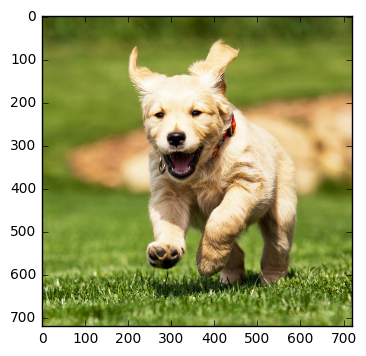

In [15]:
plt.imshow(img)
print(img.min(), img.max())

In [16]:
img2 = inception.preprocess(img)
print(img.shape), print(img2.shape)

(720, 720, 3)
(299, 299, 3)


(None, None)

In [ ]:
print(img2.min(), img2.max())

In [17]:
img_4d = img2[np.newaxis]
print(img_4d.shape)

(1, 299, 299, 3)


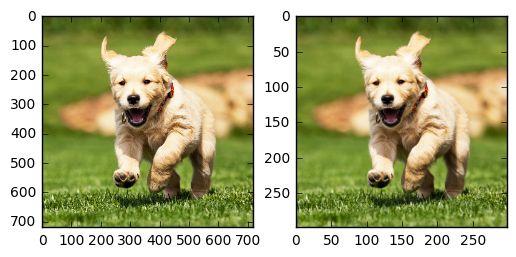

In [18]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)

# Note that unlike the lecture, we have to call the `inception.deprocess` function
# so that it adds back the mean!
axs[1].imshow(inception.deprocess(img2))

In [19]:
res = np.squeeze(softmax.eval(feed_dict={x: img_4d}))

In [14]:
res.shape

(16, 1008)

In [20]:
# Note that this is one way to aggregate the different probabilities.  We could also
# take the argmax.
res = np.mean(res, 0)
res = res / np.sum(res)

In [21]:
print([(res[idx], net['labels'][idx])
       for idx in res.argsort()[-5:][::-1]])

[(0.92407817, (125, 'golden retriever')), (0.017381113, (222, 'soccer ball')), (0.010975637, (970, 'tennis ball')), (0.0073355627, (145, 'Norwich terrier')), (0.0056557874, (50, 'Cardigan'))]
